<a href="https://colab.research.google.com/github/SamridhiParihar/Machine-Learning-Projects/blob/main/DFT_IDFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment: Perform DFT and IDFT on an image

*steps which I take to complete this*:


Step 1: Input Signal or Imag

Step 2: Define the Number of Samples (N)

Step 3: Compute the DFT Frequencies

Step 4: Compute the DFT Coefficients

Step 5: Magnitude and Phase

Step 6: Frequency Components Visualization

Step 7: Inverse DFT (IDFT) - Reconstruction

Step 8: Final Reconstruction



*****Step 1: Input Signal or Image*****

The first step is to have an input signal or image in the spatial domain. The signal could be a 1D array of values, while the image could be a 2D matrix of pixel intensities.


In [ ]:
from PIL import Image
import numpy as np

def image_to_intensity_matrix(image_path): #converting image into grayscale spatial domain
  image=Image.open(image_path)
  img_gray=image.convert('L')
  img_array=np.array(img_gray)
  norm_img_array=img_array/255.0
  return norm_img_array

image_path = '/content/WhatsApp Image 2023-07-31 at 8.42.31 AM.jpeg'
intensity_matrix = image_to_intensity_matrix(image_path)
original_image=intensity_matrix
print(intensity_matrix.shape)
print(intensity_matrix)

(1280, 960)
[[0.6627451  0.6627451  0.6627451  ... 0.60392157 0.60392157 0.60392157]
 [0.6627451  0.6627451  0.6627451  ... 0.60392157 0.60392157 0.60392157]
 [0.6627451  0.6627451  0.6627451  ... 0.60392157 0.60392157 0.60392157]
 ...
 [0.78431373 0.77647059 0.76470588 ... 0.87843137 0.88235294 0.88235294]
 [0.78431373 0.77647059 0.76470588 ... 0.86666667 0.87058824 0.87058824]
 [0.77254902 0.76470588 0.75686275 ... 0.85098039 0.85098039 0.85098039]]


since this is not a square matrix and to perfrom dft we require it we will be padding zeros


In [ ]:
import numpy as np
# creating function for that
def convert_to_square(image):

    height, width = image.shape
    n = 2 ** int(np.ceil(np.log2(max(height, width))))  # Nearest power of 2 greater than both dimensions

    square_matrix = np.zeros((n, n), dtype=np.float64)

    start_x = (n - height) // 2
    start_y = (n - width) // 2
    square_matrix[start_x:start_x + height, start_y:start_y + width] = image

    return square_matrix


In [ ]:
square_matrix_img=convert_to_square(original_image)
print(square_matrix_img)
num_non_zero = np.count_nonzero(square_matrix_img)

# Display the result
print("Number of non-zero values:", num_non_zero)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Number of non-zero values: 1228795


now we have final image



***Step 2: Define the Number of Samples (N)*** :

For the DFT process, you need to define the number of samples in the input signal or image. Let's say the signal has N samples.

In [ ]:
#here no of signal is 2048 therefore
no_of_samples=2048

***Step 3: Compute the DFT Frequencies***:


In the frequency domain, the DFT provides N frequency components. These frequencies range from 0 to N-1. For an image, you have both horizontal and vertical frequencies.



In [ ]:
# therefore we will calculte N frequency component here
import numpy as np

def compute_dft_frequencies(N):
    frequencies = np.arange(N)
    return frequencies



In [ ]:
frequency=compute_dft_frequencies(no_of_samples)
print(frequency)

[   0    1    2 ... 2045 2046 2047]


***Step 4: Compute the DFT Coefficients***

To compute the DFT coefficients, you use the following formula for each frequency component k:

DFT(k) = Σ [x(n) * e^(-j * 2 * π * k * n / N)]

where:

* x(n) is the input signal value at sample n.

* j is the imaginary unit (sqrt(-1)).

* N is the total number of samples in the input signal or image.

* k is the frequency component index (ranging from 0 to N-1).

* The formula calculates the complex DFT coefficient for each frequency component.



In [ ]:
def compute_2d_dft_coefficients(image):
  rows,cols=image.shape
  frequency_y=np.arange(rows)
  frequency_x=np.arange(cols)
  kernel = np.zeros((rows, cols), dtype=np.complex128) #dft coeff or kernel matrix values

  for i in frequency_y:
    for j in frequency_x:
      kernel[i, j] = np.sum(image * np.exp(-1j * 2 * np.pi * (j*frequency_x/cols + i*frequency_y/rows)))

  return kernel

In [ ]:

matrix_size = 2048
def compute_dft(matrix):
    # Perform the 2D FFT using NumPy's fft2 function since the original function takes a lot time as it is order of O(n**2)
    dft_coefficients = np.fft.fft2(matrix)
    return dft_coefficients

kernel = compute_dft(square_matrix_img)

# Print the result (just showing the first 10x10 values for illustration)
print(kernel[:10, :10])


[[ 7.84762573e+05    +0.j         -5.24662523e+05 +1794.6990498j
   3.61028814e+04 -6348.30313214j  1.89007393e+05+11574.33225554j
  -6.40701441e+04-12961.95881789j -8.75005898e+04 +9217.96512964j
   4.33811347e+04 -3085.50049423j  6.74336456e+04 -2195.39922351j
  -5.41815367e+04 +4866.38239918j -3.84288927e+04 -4373.34760649j]
 [-3.29508659e+05 +9243.17255525j  2.08140230e+05 -3890.3716348j
  -2.75691348e+03 -7175.50699165j -8.55771271e+04+11566.18038412j
   3.13467250e+04 -7090.84682573j  2.98559308e+04 +1918.64044162j
  -1.36302355e+04 -2985.69845939j -2.43623915e+04 +8145.92294276j
   1.35892155e+04 -9811.29537914j  2.11122702e+04 +3842.87441784j]
 [-2.21131266e+05+43361.24925365j  1.56493106e+05-28748.72372872j
  -1.61473973e+04 +7509.87036115j -5.33449556e+04 -2113.80214934j
   1.77859322e+04+11047.71051296j  2.92751350e+04-15328.16327375j
  -1.55861531e+04 +7443.67247222j -2.34544270e+04  +792.81728656j
   2.43025917e+04  +397.8556807j   6.42476187e+03 -3993.68674848j]
 [ 9.9911

In [ ]:
#this code is taking a lot time to run and hence better to use above inbuilt function although it's availble in above tab
kernel=compute_2d_dft_coefficients(square_matrix_img)
print(kernel)

KeyboardInterrupt: ignored

***Step 5: Magnitude and Phase***

The DFT coefficients obtained in Step 4 are complex numbers with real and imaginary parts. To analyze the frequency content, you can calculate the magnitude and phase of each coefficient.

The magnitude of the DFT coefficient at index k is given by:
Magnitude(k) = |DFT(k)| = sqrt(Re(DFT(k))^2 + Im(DFT(k))^2)

The phase of the DFT coefficient at index k is given by:
Phase(k) = atan2(Im(DFT(k)), Re(DFT(k)))

In [ ]:
def compute_magnitude_and_phase(kernel):
   magnitudes = np.abs(kernel)
   phases = np.angle(kernel)
   return magnitudes,phases


magnitudes, phases=compute_magnitude_and_phase(kernel)
print(magnitudes.shape)
print("Magnitudes:", magnitudes)
print(phases.shape)
print("Phases:", phases)

(2048, 2048)
Magnitudes: [[784762.57254902 524665.59219565  36656.77287362 ... 189361.45311685
   36656.77287362 524665.59219565]
 [329638.27545026 208176.58408265   7686.90266119 ...  69969.26098861
   36858.20962638 234687.58818731]
 [225342.48329305 159111.85164965  17808.32932642 ...  69642.27201287
   13387.27474666 138041.97014692]
 ...
 [126065.71551657  75426.3876915    9498.25697987 ...  33388.21034635
    7437.32349477  88771.56724092]
 [225342.48329305 138041.97014692  13387.27474666 ...  53386.81904623
   17808.32932642 159111.85164965]
 [329638.27545026 234687.58818731  36858.20962638 ...  86355.20377407
    7686.90266119 208176.58408265]]
(2048, 2048)
Phases: [[ 0.00000000e+00  3.13817199e+00 -1.74059850e-01 ... -6.11610821e-02
   1.74059850e-01 -3.13817199e+00]
 [ 3.11354863e+00 -1.86889324e-02 -1.93761842e+00 ...  2.81067010e+00
  -2.72668304e+00 -2.80576260e-03]
 [ 2.94796118e+00 -1.81680306e-01  2.70626723e+00 ...  3.04929541e+00
   7.03974596e-01 -2.43693475e-01]
 ..

***Step 6: Frequency Components Visualization***

You can visualize the magnitude and phase of the DFT coefficients using plots or images. The magnitude represents the strength of each frequency component, while the phase represents the phase shift of each component.

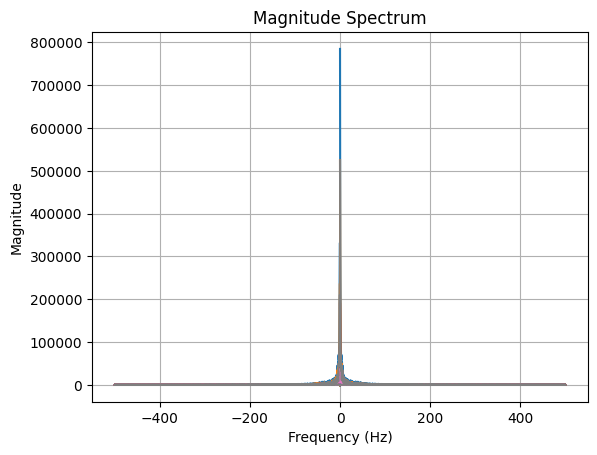

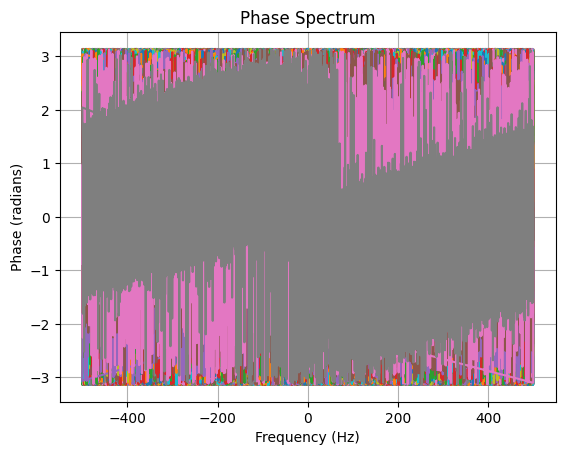

In [ ]:
import matplotlib.pyplot as plt
# Example DFT input data (replace this with your actual data)
N = 2048
sample_rate = 1000  # Sampling rate (samples per second)
frequency1 = 5      # Frequency of the first sine wave (in Hz)
frequency2 = 20     # Frequency of the second sine wave (in Hz)
time = np.arange(N) / sample_rate
signal = 0.7 * np.sin(2 * np.pi * frequency1 * time) + 0.3 * np.sin(2 * np.pi * frequency2 * time)

# Frequency bins for the x-axis (in Hz)
frequencies = np.fft.fftfreq(N, 1 / sample_rate)

# Plot magnitude spectrum
plt.figure()
plt.plot(frequencies, magnitudes)
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

# Plot phase
plt.figure()
plt.plot(frequencies, phases)
plt.title('Phase Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.grid()
plt.show()

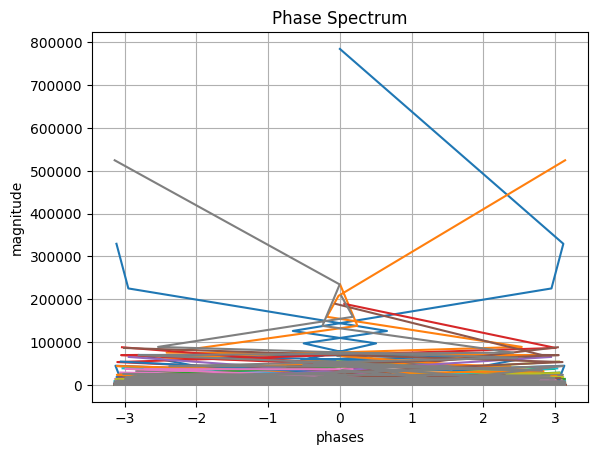

In [ ]:
# Plot phase
plt.figure()
plt.plot(phases,magnitudes)
plt.title('Phase Spectrum')
plt.xlabel('phases')
plt.ylabel('magnitude')
plt.grid()
plt.show()

***Step 7: Inverse DFT (IDFT) - Reconstruction***

To reconstruct the original signal or image from the frequency domain representation, you can use the Inverse Discrete Fourier Transform (IDFT). The IDFT process is similar to the DFT process but with a conjugate factor in the formula. For each sample n, the IDFT formula is given by:

x(n) = (1/N) * Σ [DFT(k) * e^(j * 2 * π * k * n / N)]

where the summation is over all frequency components k from 0 to N-1.

In [ ]:
def inverse_dft(dft_coefficients):
    N = len(dft_coefficients)
    idft_signal = np.zeros(N, dtype=np.complex128)

    for n in range(N):
        for k in range(N):
            idft_signal[n] += dft_coefficients[k] * np.exp(1j * 2 * np.pi * k * n / N)

    return idft_signal

In [ ]:
idft_signals=inverse_dft(kernel)

TypeError: ignored

In [ ]:
reconstructed_signal = np.fft.ifft(kernel)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


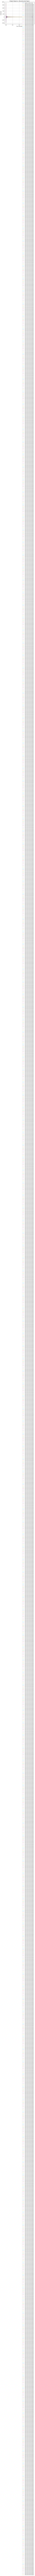

In [ ]:
N = 2048
sample_rate = 1000  # Sampling rate (samples per second)
frequency1 = 5      # Frequency of the first sine wave (in Hz)
frequency2 = 20     # Frequency of the second sine wave (in Hz)
time = np.arange(N) / sample_rate
signal = 0.7 * np.sin(2 * np.pi * frequency1 * time) + 0.3 * np.sin(2 * np.pi * frequency2 * time)

# Plot the original signal and the reconstructed signal
plt.figure()
plt.plot(time, signal, label='square_matrix_img')
plt.plot(time, reconstructed_signal.real, label='Reconstructed Signal', linestyle='dashed')
plt.title('Original Signal vs. Reconstructed Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()



